<a href="https://colab.research.google.com/github/luvbenz/2025-CV/blob/hw2/2-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving school.jpg to school (4).jpg


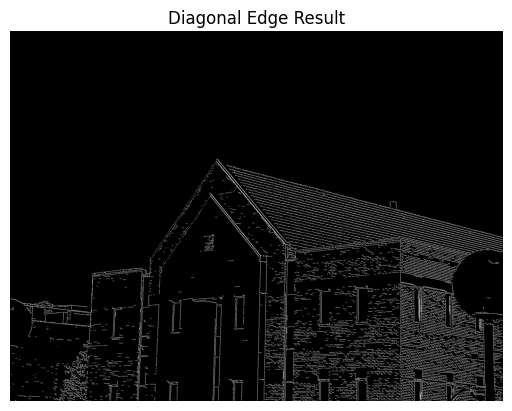

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# 파일 업로드
uploaded = files.upload()
img = cv.imread('school.jpg', cv.IMREAD_GRAYSCALE)

# sobel 마스크
sobel_45 = np.array([[0, 1, 2],
                     [-1, 0, 1],
                     [-2, -1, 0]], dtype=np.float32)

sobel_m45 = np.array([[2, 1, 0],
                      [1, 0, -1],
                      [0, -1, -2]], dtype=np.float32)

# 필터 적용 및 edge 강도 계산
g1 = cv.filter2D(img, -1, sobel_45)
g2 = cv.filter2D(img, -1, sobel_m45)
S = np.sqrt(g1.astype(np.float32)**2 + g2.astype(np.float32)**2).astype(np.uint8)

# 비최대 억제
M, N = S.shape
S_nms = np.zeros_like(S)
for y in range(1, M-1):
    for x in range(1, N-1):
        if S[y, x] >= S[y-1, x+1] and S[y, x] >= S[y+1, x-1]:
            S_nms[y, x] = S[y, x]

# 최대값 확인 후 임계값 자동 설정
max_val = np.max(S_nms)
Tlow, Thigh = int(max_val * 0.2), int(max_val * 0.4)

# edge 추적
e = np.zeros((M, N), np.uint8)
visited = np.zeros((M, N), np.uint8)

def follow_edge(y, x):
    visited[y, x] = 1
    e[y, x] = 255
    for dy in [-1, 0, 1]:
        for dx in [-1, 0, 1]:
            ny, nx = y + dy, x + dx
            if 0 <= ny < M and 0 <= nx < N:
                if S_nms[ny, nx] > Tlow and visited[ny, nx] == 0:
                    follow_edge(ny, nx)

for y in range(1, M-1):
    for x in range(1, N-1):
        if S_nms[y, x] > Thigh and visited[y, x] == 0:
            follow_edge(y, x)

# 출력
plt.imshow(e, cmap='gray')
plt.axis('off')
plt.title('Diagonal Edge Result')
plt.show()
